In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
data.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [4]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [7]:
nominal_data=data[['rank','discipline','sex']].copy()

In [8]:
nominal_data.columns

Index(['rank', 'discipline', 'sex'], dtype='object')

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


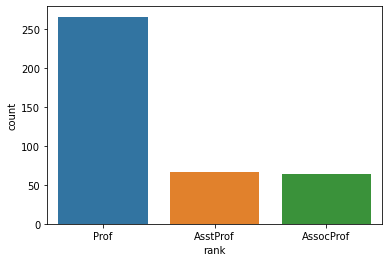

In [9]:
ax= sns.countplot(x='rank', data=nominal_data)
print(nominal_data['rank'].value_counts())

B    216
A    181
Name: discipline, dtype: int64


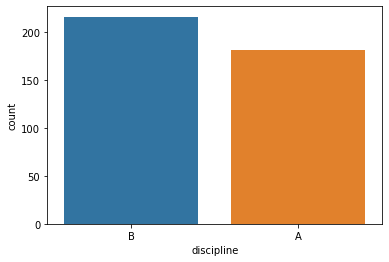

In [10]:
ax= sns.countplot(x='discipline', data=nominal_data)
print(nominal_data['discipline'].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


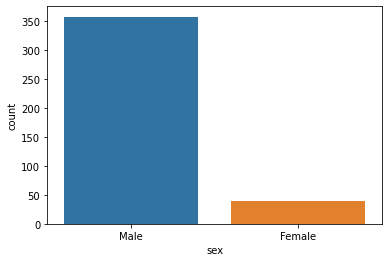

In [11]:
ax= sns.countplot(x='sex', data=nominal_data)
print(nominal_data['sex'].value_counts())

In [12]:
continuous_data=data[["yrs.since.phd","yrs.service","salary"]].copy()


<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

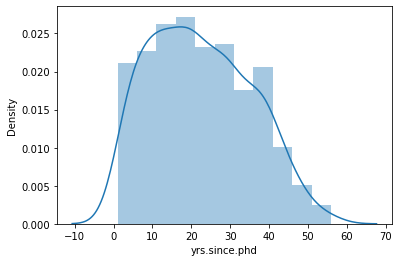

In [13]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(continuous_data["yrs.since.phd"], kde=True)

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

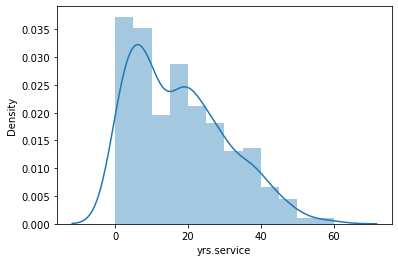

In [14]:
sns.distplot(continuous_data["yrs.service"], kde=True)

<AxesSubplot:xlabel='salary', ylabel='Density'>

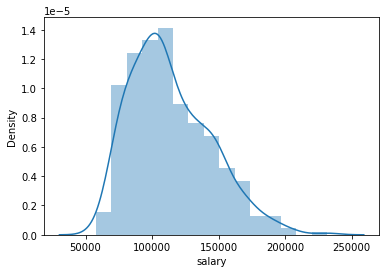

In [15]:
sns.distplot(continuous_data["salary"], kde=True)

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [17]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))
data        

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [18]:
data.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

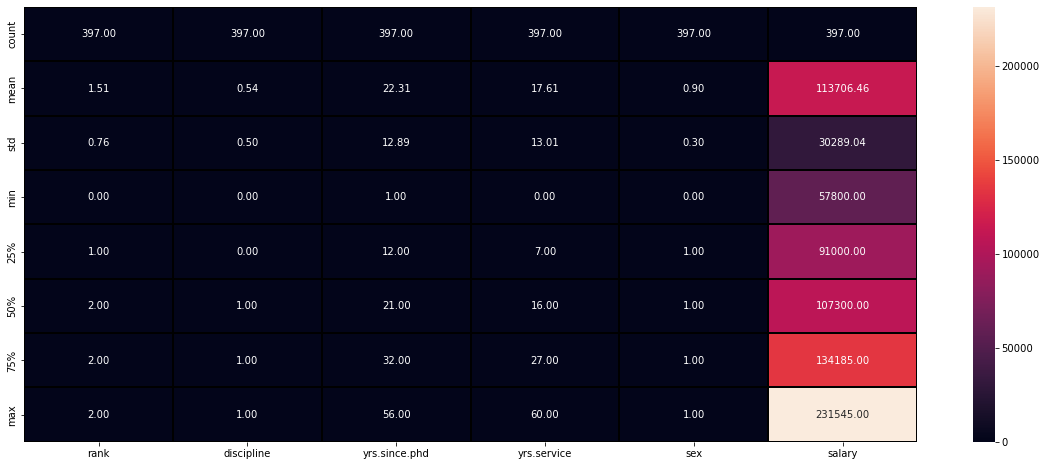

In [19]:
plt.figure(figsize=(20,8))
sns.heatmap(data.describe(),annot=True, linewidth=0.1, linecolor='black', fmt='0.2f')

In [20]:
data.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

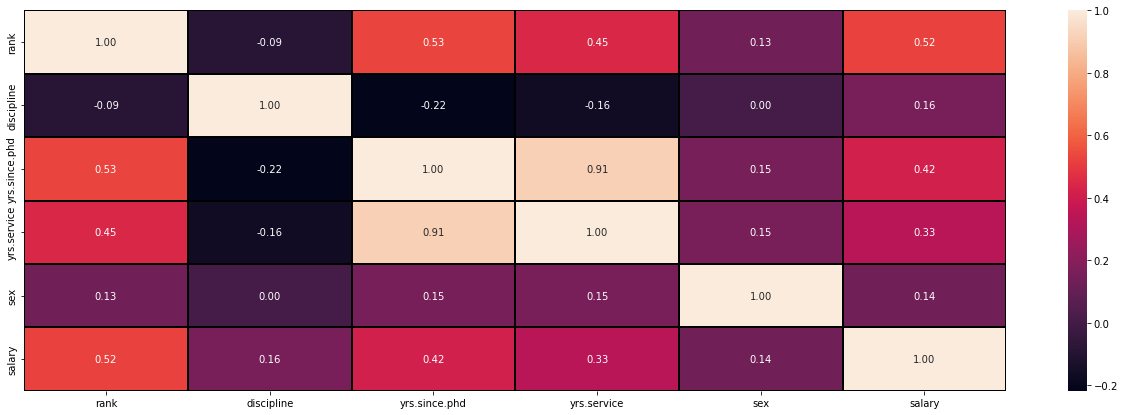

In [21]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(), annot=True, linewidth=0.1, linecolor='black', fmt='0.2f')


In [22]:
new_data=data.drop(['rank','discipline','yrs.since.phd','sex'],axis=1)

In [23]:
new_data.head()

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500


<AxesSubplot:>

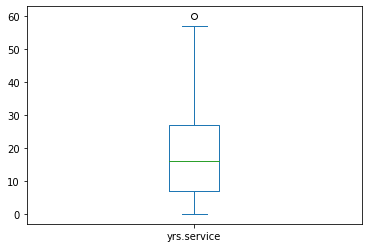

In [24]:
new_data['yrs.service'].plot.box()


<AxesSubplot:>

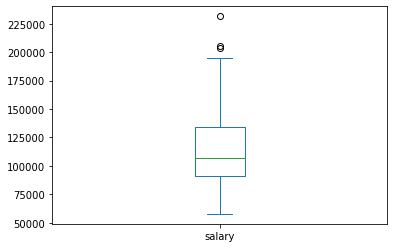

In [25]:
new_data['salary'].plot.box()


In [26]:
new_data.shape

(397, 2)

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(new_data))
threshold=3
np.where(z>3)

(array([ 43, 131, 330, 364], dtype=int64), array([1, 0, 0, 1], dtype=int64))

In [28]:
data_new_z=new_data[(z<3).all(axis=1)]
data_new_z

,yrs.service,salary
0,18,139750
1,16,173200
2,3,79750
3,39,115000
4,41,141500
...,...,...
392,30,103106
393,19,150564
394,25,101738
395,15,95329


In [29]:
data_new_z.shape

(393, 2)

In [30]:
Data_loss=((397-393)/397)*100
Data_loss

1.0075566750629723

In [31]:
x=data.drop(["salary"], axis=1)
y = data["salary"]

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=100)
y_train.head()


149     95079
118     72500
287     85000
187    107500
190    180000
Name: salary, dtype: int64

In [44]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
